# Problem Statement:
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.
Columns:1.User_ID
2.Product_ID
3.Gender
4.Age
5.Occupation
6.City_Category
7.Stay_In_Current_City_Years
8.Marital_Status
9.Product_Category_1= Cloths
10.Product_Category_2= Electronics
11.Product_Category_3= Home Goods
12.Purchase

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import csv

In [5]:
Btr = pd.read_csv('train.csv')
Btr

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [6]:
Btr.shape

(550068, 12)

In [7]:
Btr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
Btr.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
Btr.columns[Btr.isnull().any()]


Index(['Product_Category_2', 'Product_Category_3'], dtype='object')

In [10]:
Btr.apply(lambda x: sum(x.isnull()))


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
#imputing missing value in col
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(Btr.iloc[:, 9:11].values)
Btr.iloc[:,9:11] = imputer.transform(Btr.iloc[:, 9:11].values)
Btr.info() 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
Btr.apply(lambda x: sum(x.isnull()))


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [12]:
"""Dropping the columns that intuitiey should 
not imapact the purchase outcome, i.e. User_ID and Product ID."""
Btr.drop(['User_ID','Product_ID'], axis=1, inplace=True)
Btr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [13]:
Btr.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,M,55+,16,C,4+,0,8,9.842329,12.668243,7969


In [14]:
###There are still some special characters, like (+) in the columns 'Age' and 'stay in Current City_Years, which need to be removed, before machine learning algorithms can be run later.
Btr['Age']=(Btr['Age'].str.strip('+'))
Btr['Stay_In_Current_City_Years']=(Btr['Stay_In_Current_City_Years'].str.strip('+').astype('float'))


In [16]:
#Let us inspect the data now.
Btr.info()
Btr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null float64
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 42.0+ MB


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2.0,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2.0,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2.0,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2.0,0,12,14.000000,12.668243,1057
4,M,55,16,C,4.0,0,8,9.842329,12.668243,7969


In [15]:
#cad['CarName'].unique()
categorical_columns = [x for x in Btr.dtypes.index if Btr.dtypes[x]=='object']
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (Btr[col].value_counts())


Frequency of Categories for varible Gender
M    414259
F    135809
Name: Gender, dtype: int64

Frequency of Categories for varible Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55        21504
0-17      15102
Name: Age, dtype: int64

Frequency of Categories for varible City_Category
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


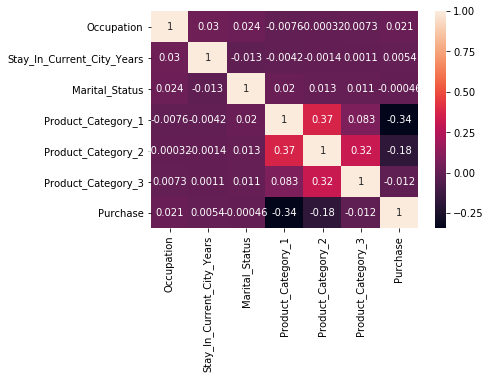

In [16]:
#data exploration is done now i will move to visualization part
"""Exploratory data analysis supported by data visualisations"""
import seaborn as sns
sns.heatmap(
    Btr.corr(),
    annot=True
)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


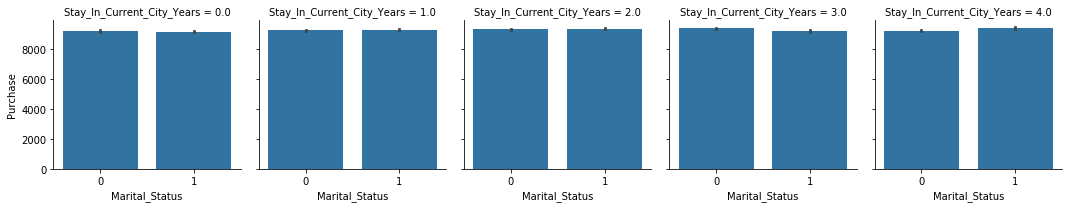

In [17]:
"The key take aways from the above plot are the positive correlation coefficients of three features as a function of Purchase:"""
#Occupation
#Stay_In_Current_City_Years
#Marital Status
"""Increase in any of the values for the above three features is likey to result in a higher purchase from the customer."""
g = sns.FacetGrid(Btr,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase")
#It is difficult to conclude anything from the above visulaisation, but it might be useful to analyse if the trend shows something different across the different cities.

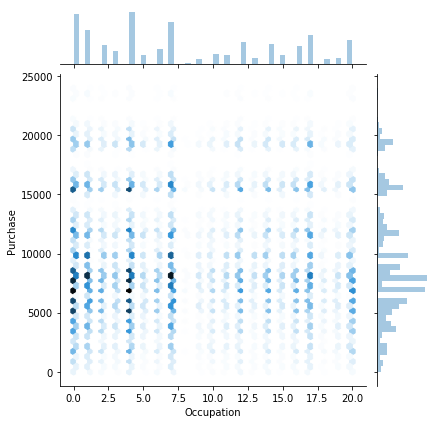

In [18]:
sns.jointplot(x='Occupation',y='Purchase',data=Btr, kind='hex')



In [ ]:
#1.First insight would be that most of the purchase is done between 5000-10000.
#2.Next important insight, would be the occupations that lead to highest purchases. In this case, it would be occupation 4, listed in the dataset, closely followed that by 0 and 7.
#One can imagine that the store can run targeted advertiements next time around to people with above listed occupations as they more likely to spend within the above purchase range.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


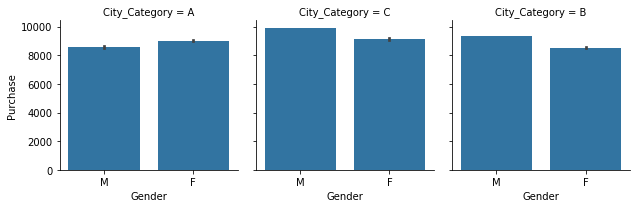

In [ ]:
#To get a better understanding, we will now analyse the purchase habits across the different city categories.
g = sns.FacetGrid(Btr,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");
#1.Clearly people from City_Category C are showing higher purchase capacity as compared to the other two cities on average.
#2.For City_categories B and C, Males tend to dominate the purchasing, whereas it is the opposite for City Category_C, where Females tend to puchase more than men. It is a useful insight, and it be useful to oserve which age group of females does higher purchasing.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


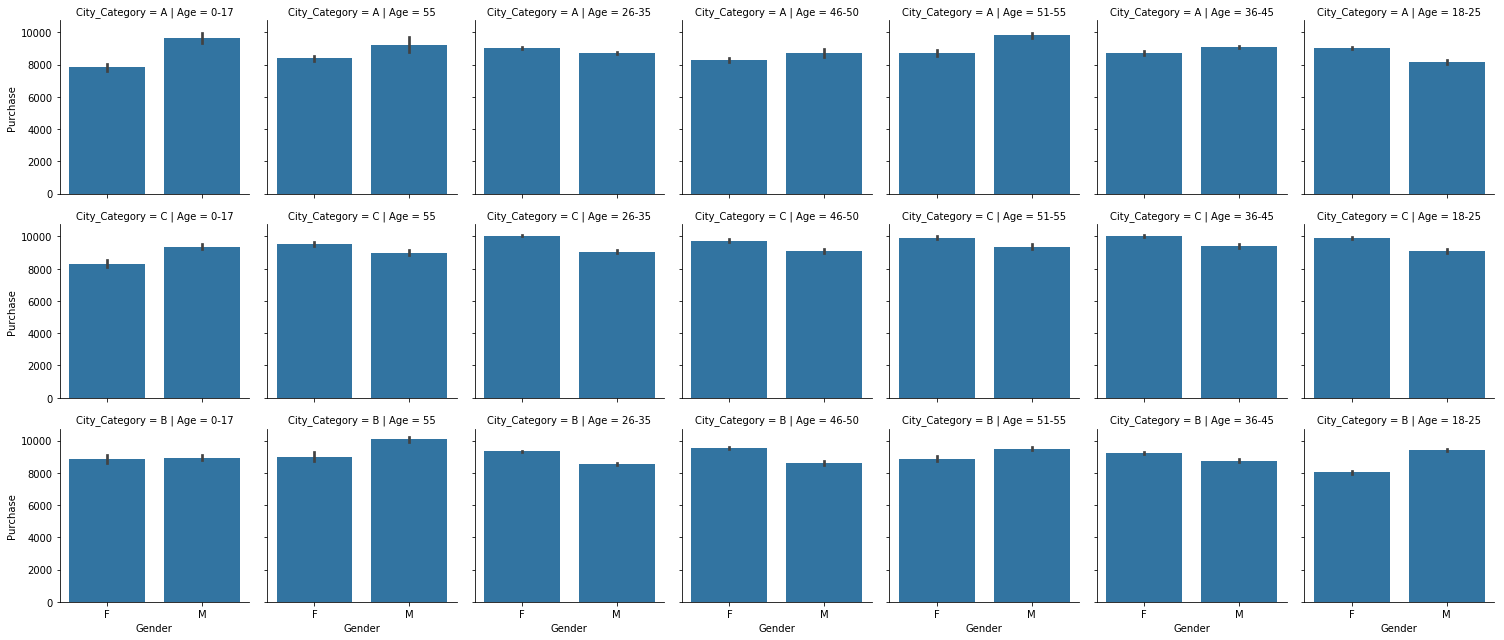

In [19]:
g = sns.FacetGrid(Btr,col="Age",row="City_Category")
g.map(sns.barplot, "Gender", "Purchase");
#So, we focus on the first row of the visuaisation, i.e. City_Category_A and then on the bar for females.
#There are two age groups that can be identified with higher purchase, 26-35 and 18-25. Therefore, apart from the male population of all the three city categories, females of City Category A in the above two identifies age groups can be identified as potential buyers for next time around.

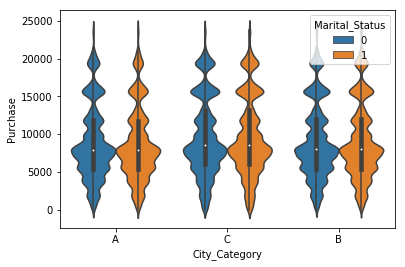

In [20]:
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status',data=Btr)
#Ananlysis of Purchase capacity as a function of Marital Status across city categories does not show a definitive trend. It would lead to a lot of assumptions and might lead to wrong conlcusions.

In [21]:
#Dividing the data into test and train datasets
X = Btr.iloc[:, 0:9].values
y = Btr.iloc[:, 9].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
X

array([['F', '0-17', 10, ..., 3, 9.842329251122386, 12.668243206790512],
       ['F', '0-17', 10, ..., 1, 6.0, 14.0],
       ['F', '0-17', 10, ..., 12, 9.842329251122386, 12.668243206790512],
       ...,
       ['F', '26-35', 15, ..., 20, 9.842329251122386, 12.668243206790512],
       ['F', '55', 1, ..., 20, 9.842329251122386, 12.668243206790512],
       ['F', '46-50', 0, ..., 20, 9.842329251122386, 12.668243206790512]],
      dtype=object)

In [23]:
y

array([ 8370, 15200,  1422, ...,   137,   365,   490], dtype=int64)

In [24]:
#label encoding the categorical variables.
#For X_train and X_test, there are categorical variables, which need to be encoded before they can be incorporated into the data model. We will convert each of the variable step by step and cross check our results.
from sklearn.preprocessing import LabelEncoder
labelencoder_X_train = LabelEncoder()
X_train[:, 0] = labelencoder_X_train.fit_transform(X_train[:, 0])
X_train

array([[1, '26-35', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, '26-35', 14, ..., 8, 17.0, 12.668243206790512],
       [1, '18-25', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, '46-50', 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, '18-25', 4, ..., 2, 4.0, 12.668243206790512],
       [1, '55', 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [25]:
X_train[:, 1] = labelencoder_X_train.fit_transform(X_train[:, 1])
X_train

array([[1, 2, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, 2, 14, ..., 8, 17.0, 12.668243206790512],
       [1, 1, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, 4, 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, 1, 4, ..., 2, 4.0, 12.668243206790512],
       [1, 6, 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [26]:
X_train[:, 3] = labelencoder_X_train.fit_transform(X_train[:, 3])
X_train

array([[1, 2, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, 2, 14, ..., 8, 17.0, 12.668243206790512],
       [1, 1, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, 4, 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, 1, 4, ..., 2, 4.0, 12.668243206790512],
       [1, 6, 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [27]:
labelencoder_X_test = LabelEncoder()
X_test[:, 0] = labelencoder_X_test.fit_transform(X_test[:, 0])
X_test

array([[1, '18-25', 0, ..., 1, 6.0, 12.668243206790512],
       [1, '51-55', 1, ..., 12, 9.842329251122386, 12.668243206790512],
       [1, '26-35', 11, ..., 6, 8.0, 15.0],
       ...,
       [1, '36-45', 0, ..., 1, 2.0, 16.0],
       [1, '26-35', 7, ..., 1, 2.0, 9.0],
       [1, '36-45', 11, ..., 6, 8.0, 10.0]], dtype=object)

In [28]:
X_test[:, 1] = labelencoder_X_test.fit_transform(X_test[:, 1])
X_test

array([[1, 1, 0, ..., 1, 6.0, 12.668243206790512],
       [1, 5, 1, ..., 12, 9.842329251122386, 12.668243206790512],
       [1, 2, 11, ..., 6, 8.0, 15.0],
       ...,
       [1, 3, 0, ..., 1, 2.0, 16.0],
       [1, 2, 7, ..., 1, 2.0, 9.0],
       [1, 3, 11, ..., 6, 8.0, 10.0]], dtype=object)

In [29]:
X_test[:, 3] = labelencoder_X_test.fit_transform(X_test[:, 3])
X_test

array([[1, 1, 0, ..., 1, 6.0, 12.668243206790512],
       [1, 5, 1, ..., 12, 9.842329251122386, 12.668243206790512],
       [1, 2, 11, ..., 6, 8.0, 15.0],
       ...,
       [1, 3, 0, ..., 1, 2.0, 16.0],
       [1, 2, 7, ..., 1, 2.0, 9.0],
       [1, 3, 11, ..., 6, 8.0, 10.0]], dtype=object)

In [30]:
# Feature Scaling of training and test set
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [32]:
# compare MAE with differing values of max_leaf_nodes
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    return(mae)

In [33]:
for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 5  		 Mean Absolute Error:  2824


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 50  		 Mean Absolute Error:  2244


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 100  		 Mean Absolute Error:  2219


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 300  		 Mean Absolute Error:  2198


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 500  		 Mean Absolute Error:  2192


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 700  		 Mean Absolute Error:  2188


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 800  		 Mean Absolute Error:  2187


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 850  		 Mean Absolute Error:  2186


In [34]:
y_test

array([15228,  1088, 16426, ..., 19456, 19586, 16544], dtype=int64)

In [ ]:
#Fitting the model with the best number of n_estimators, to avoid underfitting and overfitting.
regressor = RandomForestRegressor(n_estimators=700, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
#Lets us see what our prdicted results look like.
y_pred 